In [1]:
#Astropy
import astropy
from astropy.io import fits
from astropy.table import Table

# dlnpyutils
# from dlnpyutils.utils import bspline, mad
from dlnpyutils import utils as dln

### Itertools
import itertools as it

# Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 25})

#Numpy/Scipy
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.interpolate import interp1d, interp2d
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic, binned_statistic_2d

### fitting
import statsmodels.api as sm

# tqdm
from tqdm.notebook import tqdm

In [2]:
### Age of Universe
universe = 13.787 #+/- 0.020 Gyr 

# PARSEC

In [3]:
massive = fits.getdata('/Users/joshuapovick/Desktop/Research/parsec/parsec36_DR2_EDR3.fits')
massive = Table(massive[np.where(massive['label']==3.0)])
massive = massive[np.argsort(massive['logAge'])]
massive = massive['MH','Mass','logAge','logTe','logg','G_BPEDR3mag','GEDR3mag','G_RPEDR3mag',
                  'Jmag','Hmag','Ksmag']

cut = np.poly1d(np.polyfit([4600,5400],[0.5,2],1))

massive = massive[np.where(massive['logg']>cut(10**massive['logTe']))]

In [4]:
plt.figure(figsize=[12,10])
plt.scatter(10**massive['logTe'],massive['logg'],c=massive['MH'],cmap='nipy_spectral')
plt.colorbar()
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [5]:
cut = np.poly1d(np.polyfit([4600,5400],[0.5,2],1))

plt.figure(figsize=[12,10])
plt.scatter(10**massive['logTe'],massive['logg'])
plt.plot([4000,6000],cut([4000,6000]),c='tab:red')
# plt.plot([4600,5400],[0.5,2],c='tab:red')
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.show()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.222e+09
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        16:12:30   Log-Likelihood:                      1.4710e+06
No. Observations:             2916015   AIC:                                 -2.942e+06
Df Residuals:                 2916009   BIC:                                 -2.942e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

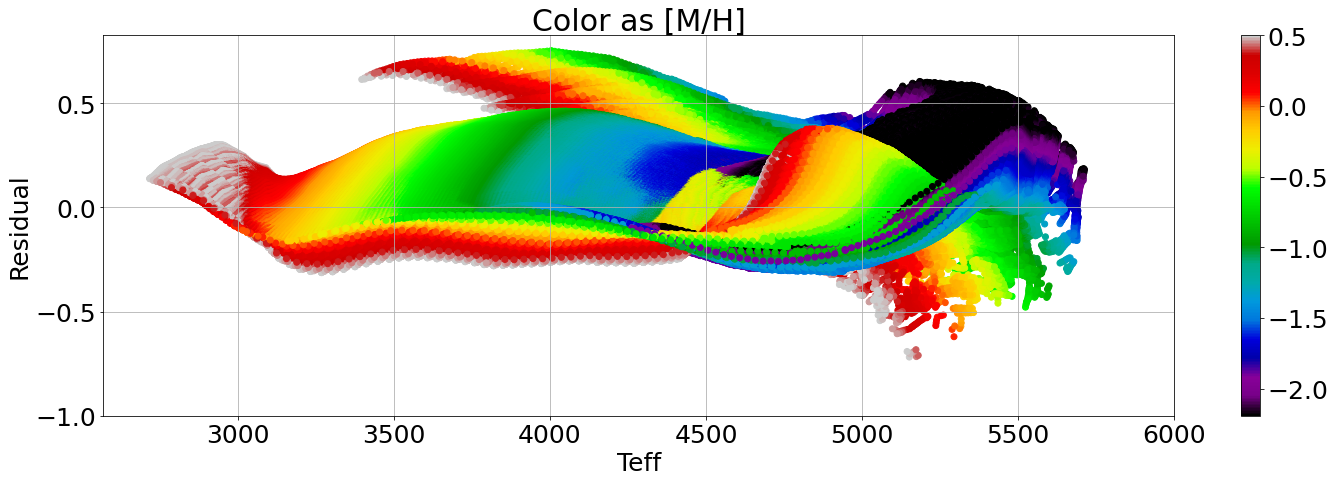

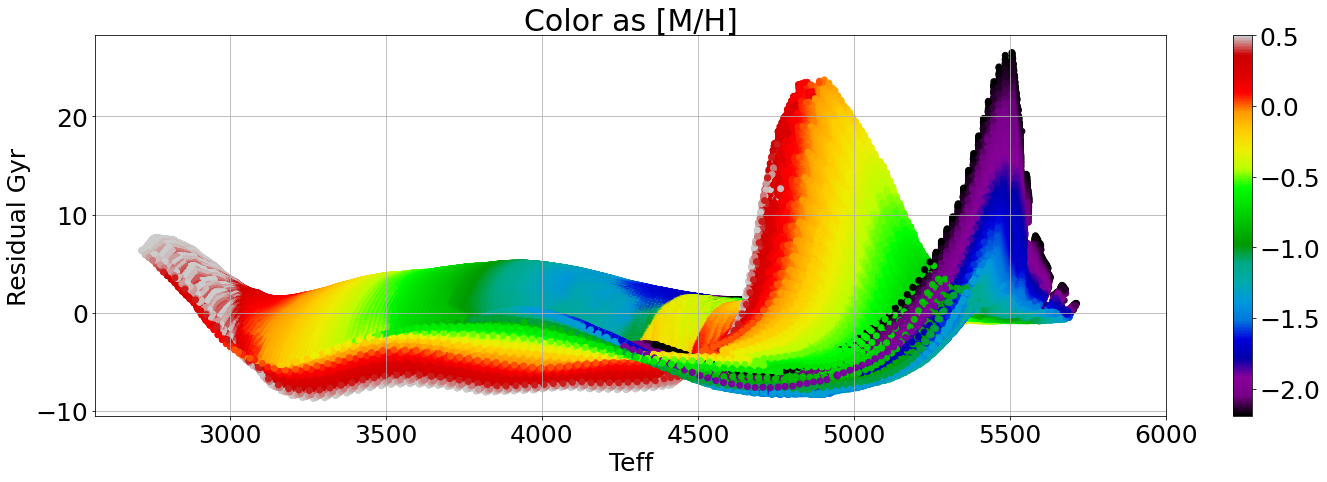

In [62]:
pmodl = np.array([(massive['GEDR3mag']-massive['Ksmag']),massive['GEDR3mag'],massive['MH'],
                  (massive['GEDR3mag']-massive['Ksmag'])**2,massive['MH']**2,
                  (massive['GEDR3mag']-massive['Ksmag'])**3]).T
# pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
residual = predictions - massive['logAge']
print(np.asarray(model.params))
print(np.max(np.absolute(residual)))
print(dln.mad(residual))
print(model.llf)

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],residual,c=massive['MH'],cmap='nipy_spectral')
plt.colorbar()
# plt.axvline(6000)
plt.xlim(right=6000)
plt.ylim(bottom=-1)
plt.grid()
plt.title(r'Color as [M/H]')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.show()

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],(10**predictions-10**massive['logAge'])/10**9,
            c=massive['MH'],cmap='nipy_spectral')
plt.colorbar()
# plt.axvline(6000)
plt.xlim(right=6000)
# plt.ylim(bottom=-1)
plt.grid()
plt.title(r'Color as [M/H]')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual Gyr')
plt.show()

In [39]:
pmodl = np.array([(massive['GEDR3mag']-massive['Ksmag']),massive['GEDR3mag'],massive['MH'],
                  (massive['GEDR3mag']-massive['Ksmag'])**2,massive['MH']**2,
                  (massive['GEDR3mag']-massive['Ksmag'])**3]).T
# pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
residual = predictions - massive['logAge']
print(np.asarray(model.params))
print(np.max(np.absolute(residual)))
print(dln.mad(residual))
print(model.llf)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.892e+09
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
Time:                        14:03:02   Log-Likelihood:                      1.2365e+06
No. Observations:             2916369   AIC:                                 -2.473e+06
Df Residuals:                 2916363   BIC:                                 -2.473e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
pmodl = np.array([massive['logTe'],massive['GEDR3mag'],massive['MH'],
                  massive['logTe']**2,massive['MH']**2,massive['logTe']**3]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
residual = predictions - massive['logAge']
print(np.asarray(model.params))
print(np.max(np.absolute(residual)))
print(dln.mad(residual))
print(model.llf)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 1.776e+06
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:56:51   Log-Likelihood:             1.3781e+06
No. Observations:             2916369   AIC:                        -2.756e+06
Df Residuals:                 2916362   BIC:                        -2.756e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6764.0372      9.381   -721.021      0.0

In [32]:
pmodl = np.array([massive['logTe'],massive['GEDR3mag'],massive['MH'],massive['logg'],
                  massive['logTe']**2,massive['MH']**2,massive['logTe']**3]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
residual = predictions - massive['logAge']
print(np.asarray(model.params))
print(np.max(np.absolute(residual)))
print(dln.mad(residual))
print(model.llf)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 9.755e+06
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:             3.7951e+06
No. Observations:             2916369   AIC:                        -7.590e+06
Df Residuals:                 2916361   BIC:                        -7.590e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9744.0933      4.182  -2329.854      0.0

In [36]:
pmodl = np.array([massive['logTe'],massive['GEDR3mag'],massive['MH'],massive['logg'],
                  massive['logTe']**2,massive['MH']**2,massive['logg']**2,massive['logTe']**3]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
residual = predictions - massive['logAge']
print(np.asarray(model.params))
print(np.max(np.absolute(residual)))
print(dln.mad(residual))
print(model.llf)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 8.685e+06
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:59:36   Log-Likelihood:             3.8193e+06
No. Observations:             2916369   AIC:                        -7.639e+06
Df Residuals:                 2916360   BIC:                        -7.638e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9751.0428      4.148  -2350.848      0.0

In [37]:
pmodl = np.array([massive['logTe'],massive['GEDR3mag'],massive['MH'],massive['logg'],
                  massive['logTe']**2,massive['MH']**2,massive['logg']**3,massive['logTe']**3]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
residual = predictions - massive['logAge']
print(np.asarray(model.params))
print(np.max(np.absolute(residual)))
print(dln.mad(residual))
print(model.llf)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 8.729e+06
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:01:03   Log-Likelihood:             3.8265e+06
No. Observations:             2916369   AIC:                        -7.653e+06
Df Residuals:                 2916360   BIC:                        -7.653e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9830.2738      4.152  -2367.748      0.0

In [4]:
# ### PCA
# from sklearn.decomposition import PCA, KernelPCA

# ### Setup 
# data = np.array([massive['G_BPEDR3mag'],massive['GEDR3mag'],massive['G_RPEDR3mag'],massive['Jmag'],massive['Hmag'],massive['Ksmag']]).T

# ### Determine Number of factors
# pca = PCA(n_components=6).fit(data)#_rescaled)
# plt.rcParams["figure.figsize"] = (12,6)

# fig, ax = plt.subplots()

# y = np.cumsum(pca.explained_variance_ratio_)
# xi = np.arange(1, len(pca.explained_variance_ratio_)+1, step=1)

# plt.ylim(0.0,1.1)
# plt.plot(xi, y, marker='o', linestyle='--', color='b')

# plt.xlabel('Number of Components')
# plt.xticks(np.arange(0, 7, step=1)) #change from 0-based array index to 1-based human-readable label
# plt.ylabel('Cumulative variance (%)')
# plt.title('The number of components needed to explain variance')

# plt.axhline(y=0.99, color='r', linestyle='-')
# plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

# ax.grid(axis='x')
# plt.show()

In [5]:
# new_phot = PCA(n_components=1).fit(data).transform(data)

In [6]:
# plt.figure(figsize=[10,10])
# plt.scatter(massive['GEDR3mag']-new_phot,massive['GEDR3mag'],c=massive['MH'],cmap='nipy_spectral')
# plt.gca().invert_yaxis()

In [7]:
# plt.figure(figsize=[10,10])
# plt.scatter(new_phot[:,1]-new_phot[:,0],new_phot[:,0],c=massive['MH'],cmap='nipy_spectral')
# plt.gca().invert_yaxis()

In [8]:
# new_phot[:,0]

In [9]:
# from sklearn.model_selection import train_test_split
# import pandas as pd

# df = massive.to_pandas()
# df.drop(columns='Mass')

# # ### Square Spectroscopic
# # df['MHsq'] = df['MH']**2
# # df['logTesq'] = df['logTe']**2
# # df['loggsq'] = df['logg']**2

# # ### Cubic Spectroscopic
# # df['MHsq'] = df['MH']**3
# # df['logTesq'] = df['logTe']**3
# # df['loggsq'] = df['logg']**3

# # ### Square Mags
# # df['BPsq'] = df['G_BPEDR3mag']**2 
# # df['Gsq'] = df['GEDR3mag']**2 
# # df['RPsq'] = df['G_RPEDR3mag']**2 
# # df['Jsq'] = df['Jmag']**2
# # df['Hsq'] = df['Hmag']**2
# # df['Kssq'] = df['Ksmag']**2

# # ### Cubic Mags
# # df['BPcu'] = df['G_BPEDR3mag']**3 
# # df['Gcu'] = df['GEDR3mag']**3 
# # df['RPcu'] = df['G_RPEDR3mag']**3 
# # df['Jcu'] = df['Jmag']**3
# # df['Hcu'] = df['Hmag']**3
# # df['Kscu'] = df['Ksmag']**3

# ### Linear Colors
# df['BP_G'] = massive['G_BPEDR3mag'] - massive['GEDR3mag']
# df['G_RP'] = massive['GEDR3mag'] - massive['G_RPEDR3mag']
# df['G_J'] = massive['GEDR3mag'] - massive['Jmag']
# df['G_H'] = massive['GEDR3mag'] - massive['Hmag']
# df['G_Ks'] = massive['GEDR3mag'] - massive['Ksmag']

# # ### Square Colors
# # df['BP_Gsq'] = df['BP_G']**2
# # df['G_RPsq'] = df['G_RP']**2
# # df['G_Jsq'] = df['G_J']**2
# # df['G_Hsq'] = df['G_H']**2
# # df['G_Kssq'] = df['G_Ks']**2

# # ### Cubic Colors
# # df['BP_Gcu'] = df['BP_G']**3
# # df['G_RPcu'] = df['G_RP']**3
# # df['G_Jcu'] = df['G_J']**3
# # df['G_Hcu'] = df['G_H']**3
# # df['G_Kscu'] = df['G_Ks']**3

In [10]:
# import statsmodels.formula.api as smf

# def forward_selected(data, response):
#     """Linear model designed by forward selection.

#     Parameters:
#     -----------
#     data : pandas DataFrame with all possible predictors and response

#     response: string, name of response column in data

#     Returns:
#     --------
#     model: an "optimal" fitted statsmodels linear model
#            with an intercept
#            selected by forward selection
#            evaluated by adjusted R-squared
#     """
#     remaining = set(data.columns)
#     remaining.remove(response)
#     selected = []
#     current_score, best_new_score = 0.0, 0.0
#     while remaining and current_score == best_new_score:
#         scores_with_candidates = []
#         for candidate in remaining:
#             formula = "{} ~ {} + 1".format(response,
#                                            ' + '.join(selected + [candidate]))
#             score = smf.ols(formula, data).fit().rsquared_adj
#             scores_with_candidates.append((score, candidate))
#         scores_with_candidates.sort()
#         best_new_score, best_candidate = scores_with_candidates.pop()
#         if current_score < best_new_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             current_score = best_new_score
#     formula = "{} ~ {} + 1".format(response,
#                                    ' + '.join(selected))
#     model = smf.ols(formula, data).fit()
#     return model

In [11]:
# model = forward_selected(df, 'logAge')

In [12]:
# ### Split Training
# from sklearn.model_selection import train_test_split
# import pandas as pd

# df = massive.to_pandas()
# df.drop(columns=['Mass','logAge'])

# ptrain, ptest, atrain, atest = train_test_split(massive['MH','logTe','logg','G_BPEDR3mag','GEDR3mag','G_RPEDR3mag','Jmag','Hmag','Ksmag'],
#                                                 massive['logAge'],test_size=0.20)



In [13]:
# import seaborn as sns

# cov_mat = np.round(np.cov(np.array([massive['MH'],massive['logTe'],massive['logg'],massive['G_BPEDR3mag'],
#                                     massive['GEDR3mag'],massive['G_RPEDR3mag']])))

# plt.figure
# plt.imshow(cov_mat)
# plt.colorbar()
# plt.show()

# eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
# print("Eigenvector: \n",eigen_vectors,"\n")
# print("Eigenvalues: \n", eigen_values, "\n")

# variance_explained = []
# for i in eigen_values:
#      variance_explained.append((i/sum(eigen_values))*100)
        
# print(variance_explained)

# cumulative_variance_explained = np.cumsum(variance_explained)
# print(cumulative_variance_explained)

# plt.figure(figsize=[12,7])
# sns.lineplot(x = [1,2,3,4,5,6], y=cumulative_variance_explained)
# plt.xlabel("Number of components")
# plt.ylabel("Cumulative explained variance")
# plt.title("Explained variance vs Number of components")

In [97]:
### Find all models

### PCA
from sklearn.decomposition import PCA, KernelPCA

data = np.array([massive['logTe'],massive['GEDR3mag'],massive['MH'],massive['logg']]).T

#transform data to new basis
# new_data = PCA(n_components=3).fit(data).transform(data)

#create new variables

# linear terms
# x1 = new_data[:,0]
# x2 = new_data[:,1]
# x3 = new_data[:,2]

x0 = massive['MH']
x1 = massive['logTe']
x2 = massive['logg']
x3 = massive['GEDR3mag']

# linear int
x01 = np.multiply(x0,x1)
x02 = np.multiply(x0,x2)
x03 = np.multiply(x0,x3)
x12 = np.multiply(x1,x2)
x13 = np.multiply(x1,x3)
x23 = np.multiply(x2,x3)

# squares
x0sq = x0**2
x1sq = x1**2
x2sq = x2**2
x3sq = x3**2

# cubes
x0cu = x0**3
x1cu = x1**3
x2cu = x2**3
x3cu = x3**3


#find all possible models
models = []
models_str = []

all_var_str = ['x0','x1','x2','x3','x0sq','x1sq','x2sq','x3sq','x0cu','x1cu','x2cu','x3cu']
all_var = [x0,x1,x2,x3,x0sq,x1sq,x2sq,x3sq,x0cu,x1cu,x2cu,x3cu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
        
models = np.array(models)
models_str = np.array(models_str)

### Fit All Models

import statsmodels.api as sm 

aics = 999999.0*np.ones(len(models))
bics = 999999.0*np.ones(len(models))
all_params = np.array([])
summaries = np.array([])
max_resid = 999999.0*np.ones(len(models))
mean_resid = 999999.0*np.ones(len(models))
median_resid = 999999.0*np.ones(len(models))
mads = 999999.0*np.ones(len(models))
lls = 999999.0*np.ones(len(models))

for i in tqdm(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
#     pmodl = sm.add_constant(pmodl)
    model = sm.OLS(massive['logAge'],pmodl).fit()
    summaries = np.append(summaries,model.summary())
    residual = massive['logAge'] - model.predict(pmodl)
    all_params = np.append(all_params,model.params)
    max_resid[i] = np.max(np.absolute(residual))
    mean_resid[i] = np.nanmean(residual)
    median_resid[i] = np.nanmedian(residual)
    mads[i] = dln.mad(residual)
    lls[i] = model.llf
    aics[i] = model.aic
    bics[i] = model.bic

<ipython-input-97-8e2e9aa9faea>:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  models = np.array(models)
<ipython-input-97-8e2e9aa9faea>:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  models_str = np.array(models_str)


Done?:   0%|          | 0/4095 [00:00<?, ?it/s]

In [ ]:
picy]ture

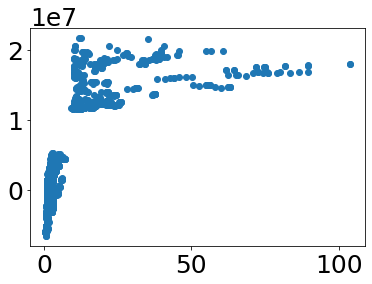

In [98]:
plt.scatter(max_resid,bics)

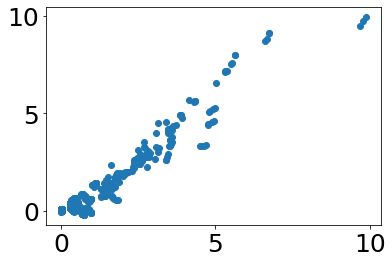

In [108]:
plt.scatter(mean_resid,median_resid)
plt.show()

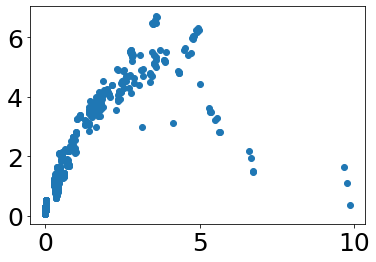

4.354376173942853e-05


(0.0, 0.6)

In [123]:
plt.scatter(mean_resid,mads)
plt.show()

plt.scatter(median_resid,mads,s=10)
print(np.min(np.abs(median_resid)))
plt.xlim(-0.25,0.25)
plt.ylim(0,0.6)

In [126]:
np.squeeze(np.where((mads<0.075)&(median_resid<0.25)&(median_resid>-0.25)))

57

In [128]:
for i in np.squeeze(np.where((mads<0.075)&(median_resid<0.25)&(median_resid>-0.25))):
    print(models_str[i])

['x0' 'x1' 'x2' 'x3' 'x1sq' 'x2sq' 'x3sq']
['x0' 'x1' 'x2' 'x3' 'x1sq' 'x0cu' 'x1cu']
['x0' 'x1' 'x2' 'x3' 'x2sq' 'x3sq' 'x1cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x0cu' 'x1cu']
['x0' 'x1' 'x2' 'x3' 'x1sq' 'x2sq' 'x3sq' 'x3cu']
['x0' 'x1' 'x2' 'x3' 'x1sq' 'x2sq' 'x0cu' 'x1cu']
['x0' 'x1' 'x2' 'x3' 'x1sq' 'x2sq' 'x1cu' 'x2cu']
['x0' 'x1' 'x2' 'x3' 'x1sq' 'x3sq' 'x0cu' 'x1cu']
['x0' 'x1' 'x2' 'x3' 'x1sq' 'x0cu' 'x1cu' 'x2cu']
['x0' 'x1' 'x2' 'x3' 'x1sq' 'x0cu' 'x1cu' 'x3cu']
['x1' 'x2' 'x3' 'x1sq' 'x2sq' 'x1cu' 'x2cu' 'x3cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x2sq' 'x0cu' 'x1cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x2sq' 'x1cu' 'x2cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x2sq' 'x1cu' 'x3cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x3sq' 'x0cu' 'x1cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x3sq' 'x1cu' 'x3cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x0cu' 'x1cu' 'x2cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x0cu' 'x1cu' 'x3cu']
['x0' 'x1' 'x2' 'x3' 'x0sq' 'x1sq' 'x1cu' 'x2cu' 'x3cu']
['x0' 'x1' 'x

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.873e+09
Date:                Tue, 09 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:20:26   Log-Likelihood:                      3.2915e+06
No. Observations:             2916015   AIC:                                 -6.583e+06
Df Residuals:                 2916003   BIC:                                 -6.583e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

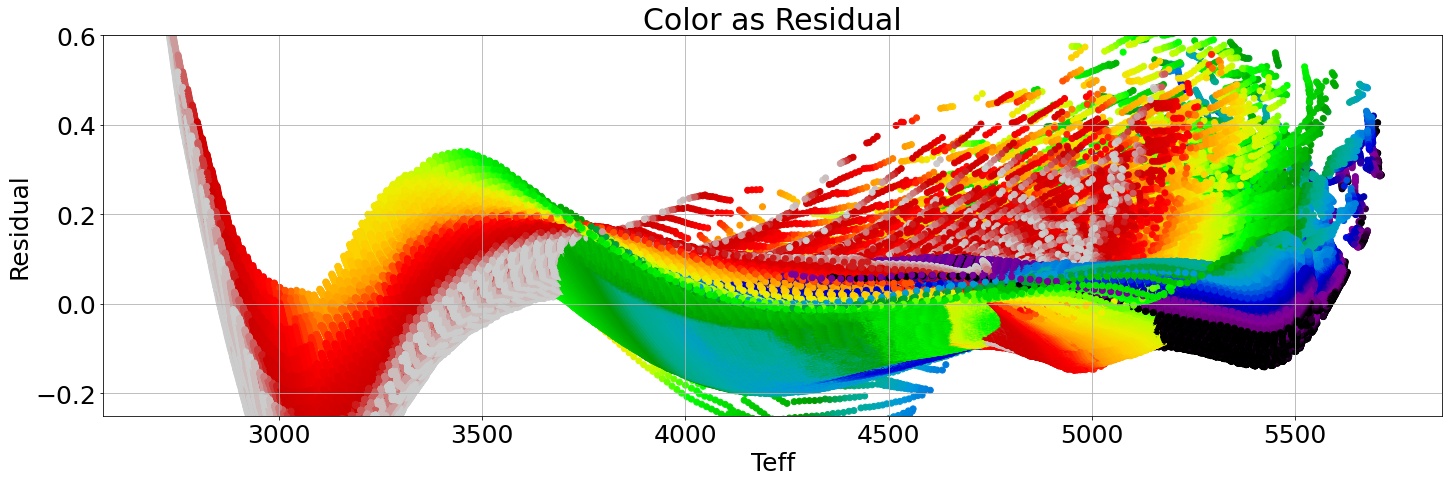

In [145]:
pmodl = np.array([x0,x1,x2,x3,x0sq,x1sq,x2sq,x3sq,x0cu,x1cu,x2cu,x3cu]).T
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
residual = massive['logAge'] - model.predict(pmodl)
print('params',all_params,model.params)
print('max resdiual',np.max(np.absolute(residual)))
print('mean residual',np.nanmean(residual))
print('median residual',np.nanmedian(residual))
print('mad',dln.mad(residual))

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],residual,c=massive['MH'],cmap='nipy_spectral')
plt.ylim(-0.25,0.6)
plt.title(r'Color as Residual')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 6.450e+06
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:21:12   Log-Likelihood:             3.9797e+06
No. Observations:             2916015   AIC:                        -7.959e+06
Df Residuals:                 2916002   BIC:                        -7.959e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.303e+04      9.828  -1326.210      0.0

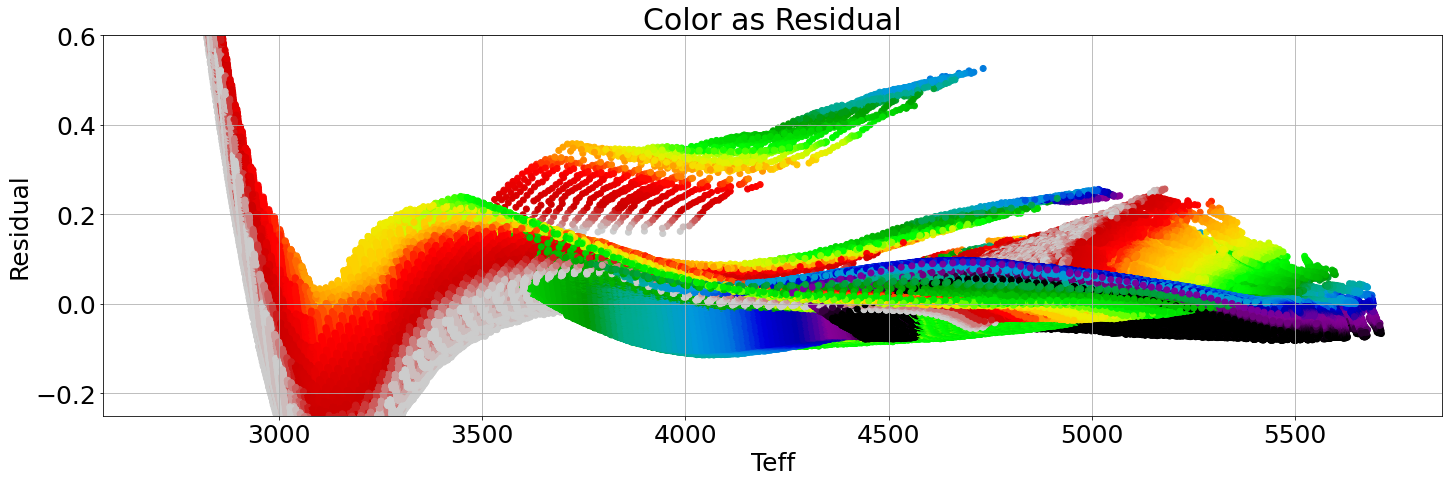

In [146]:
pmodl = np.array([x0,x1,x2,x3,x0sq,x1sq,x2sq,x3sq,x0cu,x1cu,x2cu,x3cu]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
residual = massive['logAge'] - model.predict(pmodl)
print('params',all_params,model.params)
print('max resdiual',np.max(np.absolute(residual)))
print('mean residual',np.nanmean(residual))
print('median residual',np.nanmedian(residual))
print('mad',dln.mad(residual))

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],residual,c=massive['MH'],cmap='nipy_spectral')
plt.ylim(-0.25,0.6)
plt.title(r'Color as Residual')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.grid()
plt.show()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.530e+09
Date:                Tue, 09 Aug 2022   Prob (F-statistic):                        0.00
Time:                        11:55:05   Log-Likelihood:                      4.4021e+06
No. Observations:             2916015   AIC:                                 -8.804e+06
Df Residuals:                 2915997   BIC:                                 -8.804e+06
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

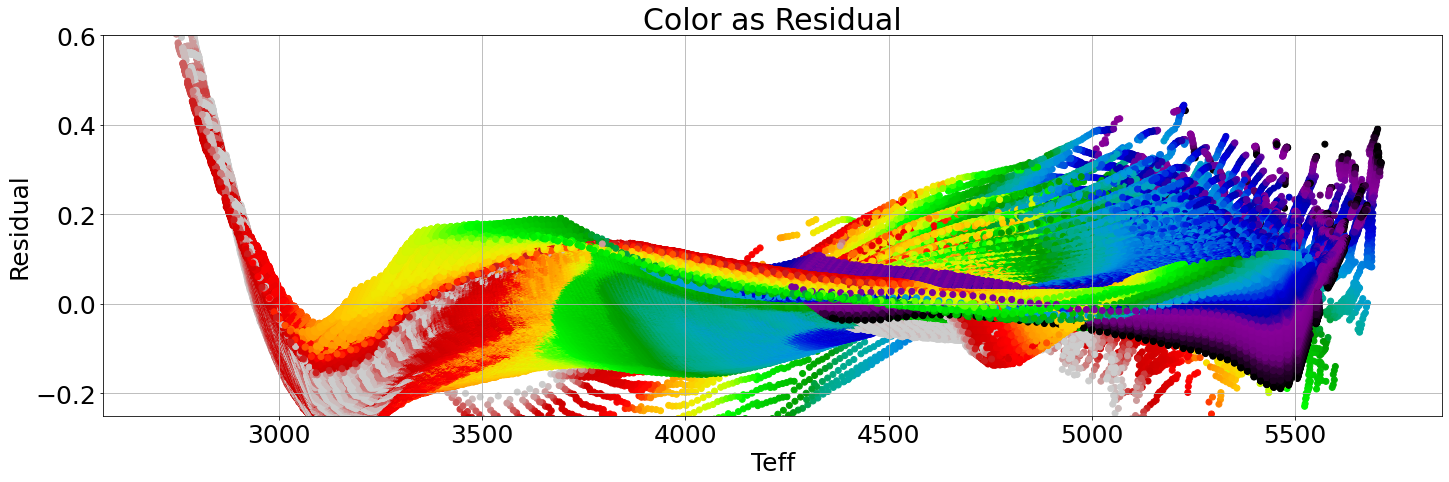

In [140]:
# linear int
x01 = np.multiply(x0,x1)
x02 = np.multiply(x0,x2)
x03 = np.multiply(x0,x3)
x12 = np.multiply(x1,x2)
x13 = np.multiply(x1,x3)
x23 = np.multiply(x2,x3)

pmodl = np.array([x0,x1,x2,x3,x01,x02,x03,x12,x13,x23,x0sq,x1sq,x2sq,x3sq,x0cu,x1cu,x2cu,x3cu]).T
# pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
residual = massive['logAge'] - model.predict(pmodl)
print('params',all_params,model.params)
print('max resdiual',np.max(np.absolute(residual)))
print('mean residual',np.nanmean(residual))
print('median residual',np.nanmedian(residual))
print('mad',dln.mad(residual))

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],residual,c=massive['MH'],cmap='nipy_spectral')
plt.title(r'Color as Residual')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.ylim(-0.25,0.6)
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 7.810e+06
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:03:06   Log-Likelihood:             4.8259e+06
No. Observations:             2916015   AIC:                        -9.652e+06
Df Residuals:                 2915996   BIC:                        -9.652e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.497e+04     15.093   -991.785      0.0

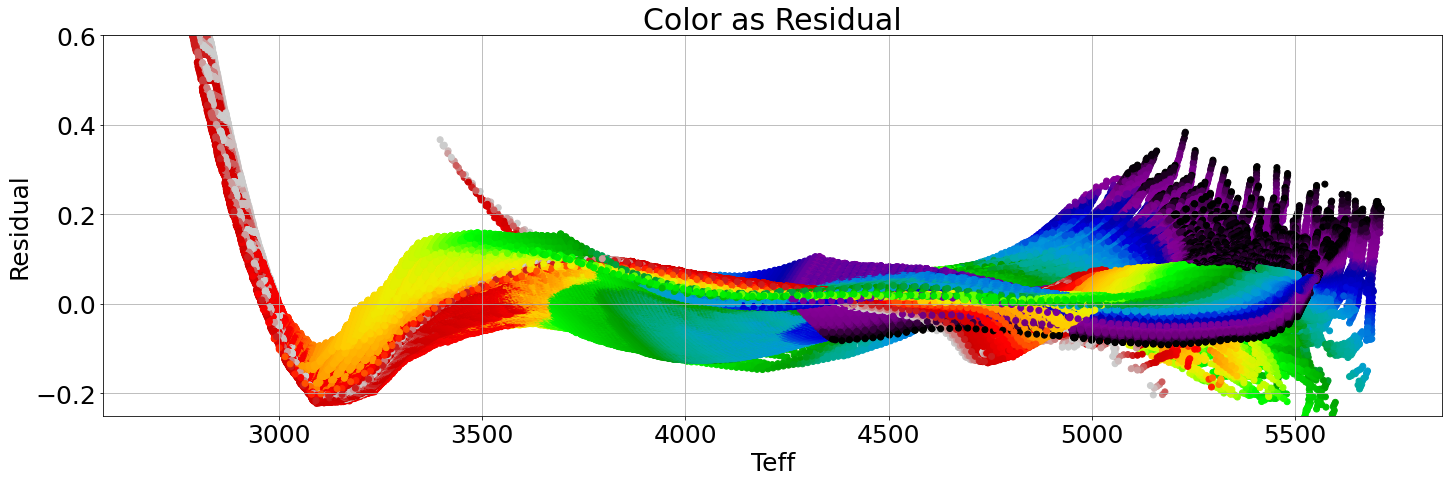

In [141]:
pmodl = np.array([x0,x1,x2,x3,x01,x02,x03,x12,x13,x23,x0sq,x1sq,x2sq,x3sq,x0cu,x1cu,x2cu,x3cu]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
residual = massive['logAge'] - model.predict(pmodl)
print('params',model.params)
print('max resdiual',np.max(np.absolute(residual)))
print('mean residual',np.nanmean(residual))
print('median residual',np.nanmedian(residual))
print('mad',dln.mad(residual))

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],residual,c=massive['MH'],cmap='nipy_spectral')
plt.title(r'Color as Residual')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.ylim(-0.25,0.6)
plt.grid()
plt.show()

In [148]:
lls[np.where(lls==np.max(lls))]

array([3291508.37555544])

In [129]:
print(summaries[np.where(mean_resid==np.nanmin(np.abs(mean_resid)))])
models_str[np.where(mean_resid==np.nanmin(np.abs(mean_resid)))]

[<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results
 Dep. Variable:                      y   R-squared (uncentered):                   0.999
 Model:                            OLS   Adj. R-squared (uncentered):              0.999
 Method:                 Least Squares   F-statistic:                          6.099e+08
 Date:                Tue, 09 Aug 2022   Prob (F-statistic):                        0.00
 Time:                        08:33:12   Log-Likelihood:                     -4.1310e+05
 No. Observations:             2916015   AIC:                                  8.262e+05
 Df Residuals:                 2916009   BIC:                                  8.263e+05
 Df Model:                           6
 Covariance Type:            nonrobust
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1            -0.3451      0.00

array([array(['x0', 'x1', 'x1sq', 'x0cu', 'x1cu', 'x3cu'], dtype='<U4')],
      dtype=object)

In [94]:
print(np.array(summaries)[np.where(np.asarray(aics)==np.min(aics))])
print(models_str[np.where(np.asarray(aics)==np.min(aics))])
print(max_resid[np.where(np.asarray(aics)==np.min(aics))])
print(mads[np.where(np.asarray(aics)==np.min(aics))])
print(lls[np.where(np.asarray(aics)==np.min(aics))])

print(np.array(summaries)[np.where(np.asarray(bics)==np.min(bics))])
print(models_str[np.where(np.asarray(bics)==np.min(bics))])
print(max_resid[np.where(np.asarray(bics)==np.min(bics))])
print(mads[np.where(np.asarray(bics)==np.min(bics))])
print(lls[np.where(np.asarray(bics)==np.min(bics))])

[<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results
 Dep. Variable:                      y   R-squared (uncentered):                   1.000
 Model:                            OLS   Adj. R-squared (uncentered):              1.000
 Method:                 Least Squares   F-statistic:                          3.873e+09
 Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
 Time:                        23:09:45   Log-Likelihood:                      3.2915e+06
 No. Observations:             2916015   AIC:                                 -6.583e+06
 Df Residuals:                 2916003   BIC:                                 -6.583e+06
 Df Model:                          12
 Covariance Type:            nonrobust
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1            -0.6105      0.00

In [96]:
print(np.array(summaries)[np.where(np.asarray(lls)==np.max(lls))])
print(models_str[np.where(np.asarray(lls)==np.max(lls))])
print(max_resid[np.where(np.asarray(lls)==np.max(lls))])
print(mads[np.where(np.asarray(lls)==np.max(lls))])
print(lls[np.where(np.asarray(lls)==np.max(lls))])

print(np.array(summaries)[np.where(np.asarray(max_resid)==np.min(max_resid))])
print(models_str[np.where(np.asarray(max_resid)==np.min(max_resid))])
print(max_resid[np.where(np.asarray(max_resid)==np.min(max_resid))])
print(mads[np.where(np.asarray(max_resid)==np.min(max_resid))])
print(lls[np.where(np.asarray(max_resid)==np.min(max_resid))])

print(np.array(summaries)[np.where(np.asarray(mads)==np.min(mads))])
print(models_str[np.where(np.asarray(mads)==np.min(mads))])
print(max_resid[np.where(np.asarray(mads)==np.min(mads))])
print(mads[np.where(np.asarray(mads)==np.min(mads))])
print(lls[np.where(np.asarray(mads)==np.min(mads))])

[<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results
 Dep. Variable:                      y   R-squared (uncentered):                   1.000
 Model:                            OLS   Adj. R-squared (uncentered):              1.000
 Method:                 Least Squares   F-statistic:                          3.873e+09
 Date:                Mon, 08 Aug 2022   Prob (F-statistic):                        0.00
 Time:                        23:09:45   Log-Likelihood:                      3.2915e+06
 No. Observations:             2916015   AIC:                                 -6.583e+06
 Df Residuals:                 2916003   BIC:                                 -6.583e+06
 Df Model:                          12
 Covariance Type:            nonrobust
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1            -0.6105      0.00

# Carrera LMC

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 2.016e+06
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:36:46   Log-Likelihood:             1.5343e+06
No. Observations:             2916015   AIC:                        -3.069e+06
Df Residuals:                 2916008   BIC:                        -3.068e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3471      0.004   -359.582      0.0

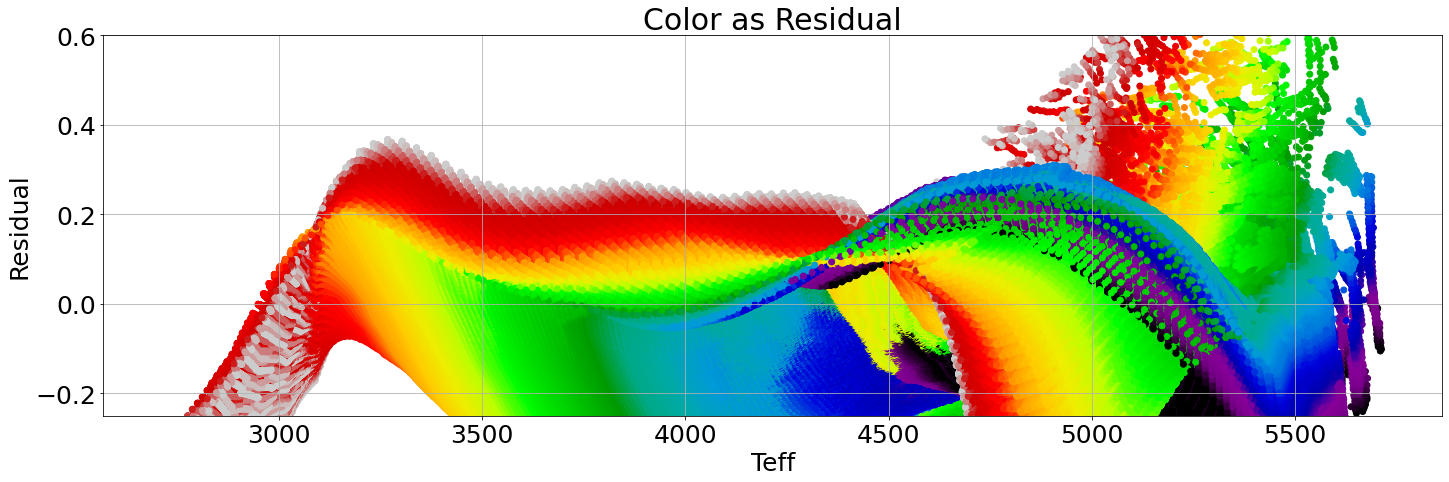

In [150]:
pmodl = np.array([(massive['GEDR3mag']-massive['Ksmag']),massive['GEDR3mag'],massive['MH'],
                  (massive['GEDR3mag']-massive['Ksmag'])**2,massive['MH']**2,
                  (massive['GEDR3mag']-massive['Ksmag'])**3]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
residual = massive['logAge'] - model.predict(pmodl)
print('params',all_params,model.params)
print('max resdiual',np.max(np.absolute(residual)))
print('mean residual',np.nanmean(residual))
print('median residual',np.nanmedian(residual))
print('mad',dln.mad(residual))

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],residual,c=massive['MH'],cmap='nipy_spectral')
plt.title(r'Color as Residual')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.ylim(-0.25,0.6)
plt.grid()
plt.show()

# Carrera SMC

In [151]:
pmodl = np.array([(massive['GEDR3mag']-massive['Ksmag']),massive['GEDR3mag'],massive['MH'],
                  (massive['GEDR3mag']-massive['Ksmag'])**2,massive['MH']**2]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
residual = massive['logAge'] - model.predict(pmodl)
print('params',all_params,model.params)
print('max resdiual',np.max(np.absolute(residual)))
print('mean residual',np.nanmean(residual))
print('median residual',np.nanmedian(residual))
print('mad',dln.mad(residual))

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],residual,c=massive['MH'],cmap='nipy_spectral')
plt.title(r'Color as Residual')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.ylim(-0.25,0.6)
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 7.368e+05
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:39:12   Log-Likelihood:             3.3622e+05
No. Observations:             2916015   AIC:                        -6.724e+05
Df Residuals:                 2916009   BIC:                        -6.724e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9800      0.003   1828.336      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 1.026e+06
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:42:27   Log-Likelihood:             8.0007e+05
No. Observations:             2916015   AIC:                        -1.600e+06
Df Residuals:                 2916008   BIC:                        -1.600e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2612      0.002   2249.582      0.0

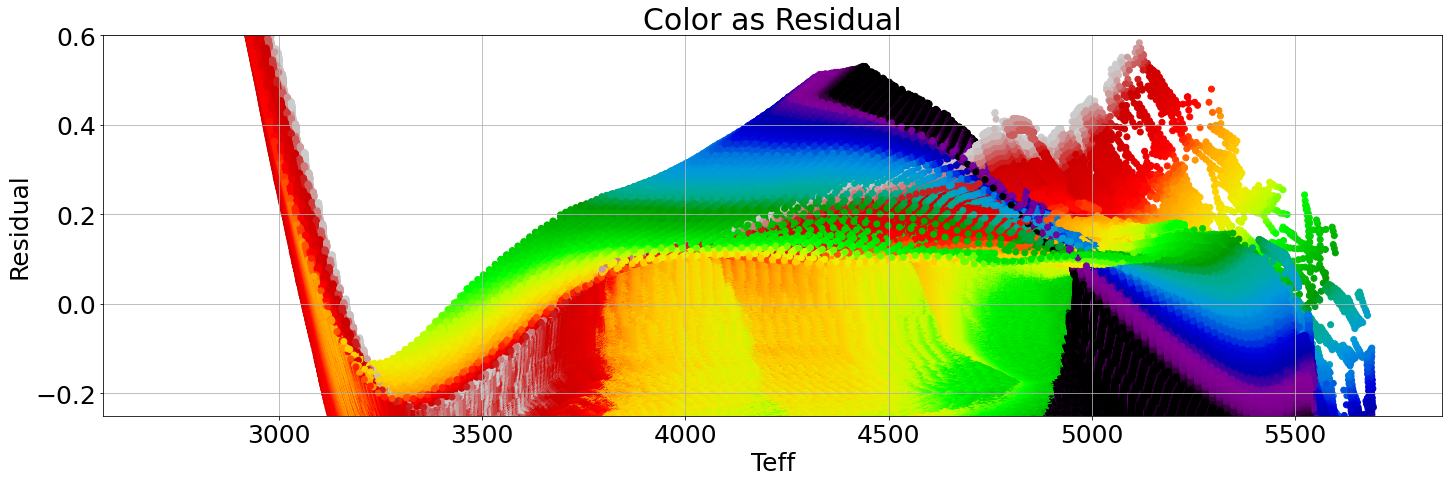

In [152]:
pmodl = np.array([(massive['GEDR3mag']-massive['Ksmag']),massive['GEDR3mag'],massive['MH'],
                  (massive['GEDR3mag']-massive['Ksmag'])**2,massive['MH']**2,
                  massive['logg']**3]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
residual = massive['logAge'] - model.predict(pmodl)
print('params',all_params,model.params)
print('max resdiual',np.max(np.absolute(residual)))
print('mean residual',np.nanmean(residual))
print('median residual',np.nanmedian(residual))
print('mad',dln.mad(residual))

plt.figure(figsize=[24,7])
plt.scatter(10**massive['logTe'],residual,c=massive['MH'],cmap='nipy_spectral')
plt.title(r'Color as Residual')
plt.xlabel(r'Teff')
plt.ylabel(r'Residual')
plt.ylim(-0.25,0.6)
plt.grid()
plt.show()

In [8]:
# data = np.array([massive['logTe'],massive['GEDR3mag'],massive['MH'],massive['logg']]).T

#transform data to new basis
# new_data = PCA(n_components=3).fit(data).transform(data)

#create new variables

# linear terms
# x1 = new_data[:,0]
# x2 = new_data[:,1]
# x3 = new_data[:,2]

x0 = massive['MH']
x1 = massive['logTe']
x2 = massive['logg']
x3 = massive['Ksmag']

# squares
x0sq = x0**2
x1sq = x1**2
x2sq = x2**2
x3sq = x3**2

# cubes
x0cu = x0**3
x1cu = x1**3
x2cu = x2**3
x3cu = x3**3


#find all possible models
models = []
models_str = []

all_var_str = ['x0','x1','x2','x3','x0sq','x1sq','x2sq','x3sq','x0cu','x1cu','x2cu','x3cu']
all_var = [x0,x1,x2,x3,x0sq,x1sq,x2sq,x3sq,x0cu,x1cu,x2cu,x3cu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
        
models = np.array(models)
models_str = np.array(models_str)

### Fit All Models

import statsmodels.api as sm 

aics = 999999.0*np.ones(len(models))
bics = 999999.0*np.ones(len(models))
all_params = np.array([])
summaries = np.array([])
max_resid = 999999.0*np.ones(len(models))
mean_resid = 999999.0*np.ones(len(models))
median_resid = 999999.0*np.ones(len(models))
mads = 999999.0*np.ones(len(models))
lls = 999999.0*np.ones(len(models))

for i in tqdm(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(massive['logAge'],pmodl).fit()
    summaries = np.append(summaries,model.summary())
    residual = massive['logAge'] - model.predict(pmodl)
    all_params = np.append(all_params,model.params)
    max_resid[i] = np.max(np.absolute(residual))
    mean_resid[i] = np.nanmean(residual)
    median_resid[i] = np.nanmedian(residual)
    mads[i] = dln.mad(residual)
    lls[i] = model.llf
    aics[i] = model.aic
    bics[i] = model.bic

<ipython-input-8-8ae0dec96f52>:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  models = np.array(models)
<ipython-input-8-8ae0dec96f52>:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  models_str = np.array(models_str)


Done?:   0%|          | 0/4095 [00:00<?, ?it/s]

In [9]:
aics

array([  1708850.04838815,   1656146.43722125,   1698553.39830396, ...,
       -12339317.14920887, -11543026.0913576 , -12405397.4471273 ])

In [16]:
# ### Fit All Models

# import statsmodels.api as sm 

# dat = np.array([]).T

# all_params = []
# max_resid = []
# mads = []
# ll = []
# for i in tqdm(range(len(models)),desc='Done?'):
#     pmodl = np.array(models[i]).T
#     pmodl = sm.add_constant(pmodl)
#     model = sm.OLS(massive['logAge'],pmodl).fit()
#     predictions = model.predict(pmodl)
#     residual = predictions - massive['logAge']
#     all_params.append(np.asarray(model.params))
#     max_resid.append(np.max(np.absolute(residual)))
#     mads.append(dln.mad(residual))
#     ll.append(model.llf)

Done?:   0%|          | 0/261156 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [29]:
models_str[np.array(mads).argmin()]

array(['x1', 'x2', 'x3', 'x0sq', 'x1sq', 'x3sq', 'x1cu', 'x2cu', 'x3cu'],
      dtype='<U4')

In [19]:
pmodl = np.array([x0,x1,x2,x3,x0sq,x1sq,x2sq,x3sq,x0cu,x1cu,x2cu,x3cu]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 5.968e+06
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:18:08   Log-Likelihood:             3.8617e+06
No. Observations:             2916369   AIC:                        -7.723e+06
Df Residuals:                 2916356   BIC:                        -7.723e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9612.4450      4.827  -1991.368      0.000   -9621.906   -9602.984
x1            -0.1682      0.000   -411.713      0.000      -0.169      -0.167
x2          7696.1086      3.968   1939.438      0.000    7688.331    7703.886
x3            -2.3302      0.001  -2056.261      0.000      -2.332      -2.328
x4             1.1072      0.000   5470.296      0.000       1.107       1.108
x5            -0.0375      0.000   -134.739      0.000      -0.038      -0.037
x6         -2051.4036      1.088  -1886.215      0.000   -2053.535   -2049.272
x7             0.0052      0.000     11.623      0.000       0.004       0.006
x8             0.0045    4.2e-05    107.325      0.000       0.004       0.005
x9            -0.0108      0.000    -96.055      0.000      -0.011      -0.011
x10          182.3288      0.099   1834.629      0.000     182.134     182.524
x11           -0.0066   8.67e-05    -76.243      0.000      -0.007      -0.006
x12           -0.0011   8.89e-06   -119.233      0.000      -0.001      -0.001
==============================================================================
Omnibus:                  1051382.186   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        520043390.777
Skew:                           0.200   Prob(JB):                         0.00
Kurtosis:                      68.418   Cond. No.                     8.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
pmodl = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu,x3cu]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(massive['logAge'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
residual = predictions - massive['logAge']
print(np.asarray(model.params))
print(np.max(np.absolute(residual)))
print(dln.mad(residual))
print(model.llf)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 5.686e+06
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:16:53   Log-Likelihood:             3.7939e+06
No. Observations:             2916369   AIC:                        -7.588e+06
Df Residuals:                 2916356   BIC:                        -7.588e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1501   8.62e-05   1.18e+05      0.0

In [ ]:
def str2eq(model_str,model_params):
    '''
    Create polynomial model using string and parameters included. Assuming the existence of a constant term
    and the following conventions
    
    xN: linear term
    xNsq: square term
    xNcu: cubic term
    
    Input:
    -----
        model_str:    array of length N
                      strings of model variables
                      
        model_params: array of length N+1
                      model parameters with model_params[0] as the constant term and every other as the 
                      coresponding value for each element of model_str
    '''
    
    var =
    deg = 999999.0*np.
    
    for i in range(len(model_str)):
        if model_str[:-2] == 'cu':
            deg

In [ ]:
'x1cu'[-2:]

01,02,03
12,13
23